# Определение перспективного тарифа для телеком-компании

<h2>Открытие файлов с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats as st

In [2]:
from matplotlib import pyplot as plt

<h3> Таблица <i>users</i> (информация о пользователях):

In [3]:
df_u = pd.read_csv('/datasets/users.csv') 
display(df_u.info())
display(df_u.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<b>Выводы:</b><br>
 - данные заполнены верно;
 - типы данных в столбцах "Дата регистрации" и "Дата прекращения пользования тарифом" имеют строчный тип - можно перевести в тип "дата"

<h3>Таблица <i>calls</i> (информация о звонках):

In [4]:
df_c = pd.read_csv('/datasets/calls.csv') 
display(df_c.info())
display(df_c.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<b>Выводы:</b><br>
 - данные заполнены верно;
 - типы данных в столбце "Дата звонка" имеет строчный тип - можно перевести в тип "дата"

<h3>Таблица <i>messages</i> (информация о сообщениях):

In [5]:
df_m = pd.read_csv('/datasets/messages.csv') 
display(df_m.info())
display(df_m.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<b>Выводы:</b><br>
 - данные заполнены верно;
 - типы данных в столбце "Дата сообщения" имеет строчный тип - можно перевести в тип "дата"

<h3>Таблица <i>internet</i> (информация об интернет-сессиях):

In [6]:
df_i = pd.read_csv('/datasets/internet.csv') 
display(df_i.info())
display(df_i.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<b>Выводы:</b><br>
 - дублирования столбца с индексом (Unnamed: 0) - необходимо удалить;
 - данные заполнены верно;
 - типы данных в столбце "Дата сессии" имеет строчный тип - можно перевести в тип "дата"

<h3>Таблица <i>tariffs</i> (информация о тарифах):

In [7]:
df_t = pd.read_csv('/datasets/tariffs.csv') 
display(df_t.info())
display(df_t.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<b>Выводы:</b><br>
 - данные заполнены верно

<h2> Подготовка данных

<h3> Оптимизация исходных данных

In [8]:
#приведение столбцов с датами
df_u['churn_date'] = pd.to_datetime(df_u['churn_date'])
df_u['reg_date'] = pd.to_datetime(df_u['reg_date'])
df_c['call_date'] = pd.to_datetime(df_c['call_date'])
df_m['message_date'] = pd.to_datetime(df_m['message_date'])
df_i['session_date'] = pd.to_datetime(df_i['session_date'])

<h3>Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам

<b>Приведение данных в соответствие с примечанием:</b>
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [9]:
#округление секунд до минут (с преобразованием в целочисленный тип столбца)
df_c['duration'] = df_c['duration'].apply(np.ceil).astype('Int64')

In [10]:
#приведение даты к виду "№ месяца"
df_c['call_date'] = df_c['call_date'].dt.month

In [11]:
#подсчёт суммарного количества звонков и минут (создание сводной таблицы)
df_c_pt=df_c.pivot_table(index=['user_id','call_date'], values='duration',aggfunc=['count', 'sum'])

display(df_c_pt.head())

count      sum
                  duration duration
user_id call_date                  
1000    5               22      159
        6               43      172
        7               47      340
        8               52      408
        9               58      466

<h3>Подсчет количества отправленных сообщений по месяцам

In [12]:
#приведение даты к виду "№ месяца"
df_m['message_date'] = df_m['message_date'].dt.month

In [13]:
#подсчёт суммарного количества сообщений (создание сводной таблицы)
df_m_pt=df_m.pivot_table(index=['user_id','message_date'], values='id',aggfunc='count')
df_m_pt.index.names = ['user_id','month']
display(df_m_pt.head())

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

<h3>Подсчет количества объема израсходованного интернет-трафика по месяцам

<b>Приведение данных в соответствие с примечанием:</b>
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [14]:
#удаление дублирующегося столбца 
df_i=df_i.drop('Unnamed: 0', axis = 1)

In [15]:
#приведение даты к виду "№ месяца"
df_i['session_date'] = df_i['session_date'].dt.month

In [16]:
#объединение и округление трафика (создание сводной таблицы)
df_i_pt=df_i.pivot_table(index=['user_id','session_date'], values='mb_used',aggfunc=['sum'])
df_i_pt['mb_s']=(df_i_pt['sum']/1024).apply(np.ceil).astype('Int64')

In [17]:
#удаление лишнего столбца из сводной таблицы
df_i_pt=df_i_pt.drop('sum', axis = 1)
display(df_i_pt.head())

mb_s
                         
user_id session_date     
1000    5               3
        6              23
        7              14
        8              14
        9              15

<h3> Подсчет помесячной выручки с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

In [18]:
#Создание справочника тарифов пользователей 
df_u_pt=df_u.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis = 1)
display(df_u_pt.head())

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [19]:
#Объединение всех приведеных данных в одну таблицу
df_s=pd.concat([df_c_pt,df_m_pt,df_i_pt],sort=False,axis=1)
df_s=df_s.reset_index()
df_s.columns = ['user_id','month','count_сall', 'sum_сall', 'count_mes', 'gb']
#Приведение типов данных к целочисленным и заполнение пустых значений "0"
df_s['count_сall']=df_s['count_сall'].fillna(0).astype('Int64')
df_s['count_mes']=df_s['count_mes'].fillna(0).astype('Int64')
df_s['gb']=df_s['gb'].fillna(0).astype('Int64')
df_s=df_s.merge(df_u_pt, how = 'left', left_on='user_id', right_on='user_id')
df_s=df_s.merge(df_t, how = 'left', left_on='tariff', right_on='tariff_name')

df_s=df_s.drop('tariff_name', axis = 1)

display(df_s.head())

,user_id,month,count_сall,sum_сall,count_mes,gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,3,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,23,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,14,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,14,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,15,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [20]:
def cost_s(d):
    sum=d['rub_monthly_fee']
    if d['sum_сall']>d['minutes_included']:
        sum += (d['sum_сall']-d['minutes_included'])*d['rub_per_minute']
    if d['count_mes']>d['messages_included']:
        sum += (d['count_mes']-d['messages_included'])*d['rub_per_message']
    if d['gb']>(d['mb_per_month_included']/1024):
        sum += (d['gb']-(d['mb_per_month_included']/1024))*d['rub_per_gb']
    return sum        
 

df_s['cost']=df_s.apply(lambda d: cost_s(d),axis=1).astype('Int64')

df_s=df_s.drop(['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis = 1)

display(df_s.head(10))

,user_id,month,count_сall,sum_сall,count_mes,gb,city,tariff,cost
0,1000,5,22,159,22,3,Краснодар,ultra,1950
1,1000,6,43,172,60,23,Краснодар,ultra,1950
2,1000,7,47,340,75,14,Краснодар,ultra,1950
3,1000,8,52,408,81,14,Краснодар,ultra,1950
4,1000,9,58,466,57,15,Краснодар,ultra,1950
5,1000,10,57,350,73,15,Краснодар,ultra,1950
6,1000,11,43,338,58,15,Краснодар,ultra,1950
7,1000,12,46,333,70,10,Краснодар,ultra,1950
8,1001,11,59,430,0,18,Москва,smart,1150
9,1001,12,63,414,0,14,Москва,smart,550


<h2>Анализ данных

<b>Описание поведения клиентов оператора, исходя из выборки. 

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?<br>
<br>Постройте гистограммы. <br>Опишите распределения.

In [21]:
#Cреднее количество
display(df_s.pivot_table(index='tariff', values=['sum_сall','count_mes','gb','cost'],aggfunc='mean'))

,cost,count_mes,gb,sum_сall
tariff,,,,
smart,1289.973531,33.384029,16.328847,419.062978
ultra,2070.152284,49.363452,19.494416,545.451104


<b> По среднему количеству</b> все рассматриваемые показатели в тарифе "ultra" превышают базовый тариф "smart"

In [22]:
#Дисперсия
display(df_s.pivot_table(index='tariff', values=['sum_сall','count_mes','gb'],aggfunc='var'))

,count_mes,gb,sum_сall
tariff,,,
smart,796.812958,33.028705,35844.189551
ultra,2285.266143,97.091686,94203.418396


<b> По дисперсии</b> можем сделать вывод о том, что в тарифе "ultra" разброс значений значительно (в 3 раза) выше в сравнении с тарифом "smart"

In [23]:
#Стандартное отклонение
display(df_s.pivot_table(index='tariff', values=['sum_сall','count_mes','gb'],aggfunc='std'))

,count_mes,gb,sum_сall
tariff,,,
smart,28.227876,5.747061,189.325618
ultra,47.804457,9.853511,306.925754


<b> По стандартному отклонению</b> можем понять, что в тарифе "ultra" отклонение выше, чем в тарифе "smart"

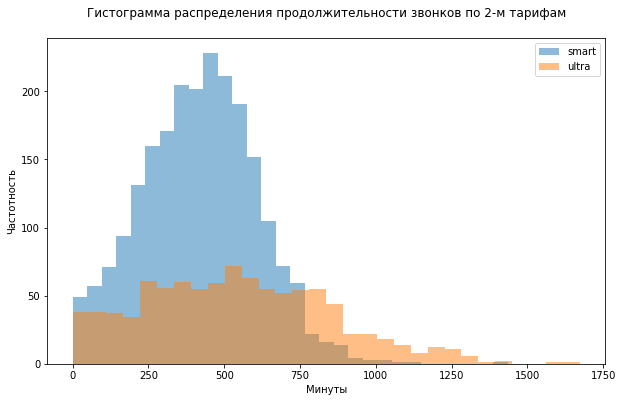

In [25]:
plt.figure(figsize=(10, 6))
df_s['sum_сall'][df_s['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=30)
df_s['sum_сall'][df_s['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Гистограмма распределения продолжительности звонков по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

plt.show()

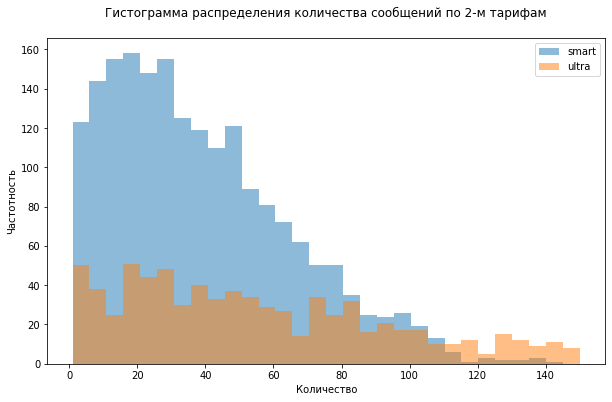

In [26]:
plt.figure(figsize=(10, 6))
df_s['count_mes'][df_s['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=30,range=(1, 150))
df_s['count_mes'][df_s['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=30,range=(1, 150))
plt.title('Гистограмма распределения количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Количество')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

plt.show()

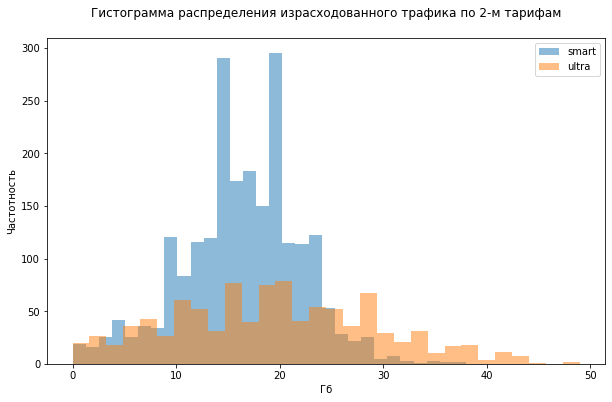

In [27]:
plt.figure(figsize=(10, 6))
df_s['gb'][df_s['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=30)
df_s['gb'][df_s['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Гистограмма распределения израсходованного трафика по 2-м тарифам'+ "\n")
plt.xlabel('Гб')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

plt.show()

<b>На основании гистограмм </b> выводы статистического анализа подтверждаются.
Также стоит отметить следующие особенности:
 - максимальные пиковые показатели использования услуг приходятся на тариф "smart";
 - в тарифе "ultra" наблюдаются более равномерные показатели по всем услугам связи во всем диапазоне значений;
 - закономерно, что средние показатели по тарифам выше в тарифе "ultra";
 - распределения в тарифах по количеству минут и мегабайт - нормальное, по количеству сообщений - распределение Пуассона.

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки гипотезы создадим две соответствующие выборки mos и oth.

Критический уровень значимости поставим 0.05, чтобы вероятность вывода была не мение 95%.

In [28]:
#создадим две выборки для тарифа «Ультра» и «Смарт»
ultra = df_s[df_s['tariff'] == 'ultra']
smart = df_s[df_s['tariff'] == 'smart']

alpha = 0.05
results = st.ttest_ind(ultra['cost'], smart['cost'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 4.260631393082884e-250
Отвергаем нулевую гипотезу


<b>Нулевой гипотезой была гипотеза о равенстве средних наших выборок. </b>

Очень маленькое p-value свидетельствует о том, что вероятность случайного совпадения средних наших выборок ничтожно мало. <b>Нулевая гипотеза отвергается!</b>

А значит сформулированная нами альтернативная гипотеза о том, что средние наших выборок отличаются, не отвергается!

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотезы создадим две соответствующие выборки mos и oth.

Критический уровень значимости поставим 0.05, чтобы вероятность вывода была не мение 95%.

In [29]:
#создадим две выборки для Москвы и остальных городов
mos = df_s[df_s['city'] == 'Москва']
oth = df_s[df_s['city'] != 'Москва']

alpha = 0.05
results = st.ttest_ind(mos['cost'], oth['cost'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5257376663729292
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b>

Соотношение в двух наших таблицах клиентов с разными тарифами примерно одинаковое, поэтому нам не пришлось создавать 4 таблицы.

p-value равно 0.526, следовательно есть большая вероятность того, что отличие средних значений наших выборок случайно и мы не можем отвергнуть нулевую гипотезу, которая говорит нам о равенстве средних значений.

Значит, нашу альтернативную гипотезу о различии средних мы отвергаем!

# Общий вывод

Из предоставленных нам таблиц получены все необходимые значения израсходованных минут, мегабайт и сообщений, а также прибыль по каждому месяцу.

Из полученных значений можно сделать следующие выводы:
 - прибыльность по тарифам отличается - в среднем пользователи тарифа Смарт тратят на услуги связи около 1200р (что у 2 раза превышает стоимость базового тарифа) при этом в тарифе Ультра прослеживается небольшое количество дополнительно оплаченных услуг, что говорит о средней достаточности входящих в пакет объёмов; 
 - в обоих тарифах средние значения использованных услуг отличаются не значительно;
 - по минутам в целом средние показатели схожи, с поправкой на то, что в тарифе смарт, многие пользователи расходуют минуты оплачивая их сверх включенных в пакет;
 - по сообщениям видно, что бОльшая часть пользователей не пользуется в полным объемом предоставленных пакетных сообщений и при этом количество сообщений по обоим тарифам незначительно;
 - по интернет услугам прослеживается значительная нехватка пакетных Гб пользователям тарифа Смарт, что приводит к расходам на покупку дополнительных услуг сверх пакета.

Также было проведедена проверка гипотиз и получены выводы о том, что с большей вероятностью выручка от тарифов различается и вероятно, что пользователи Москвы не значительно отличаются от пользователей из других регионов по предпочтениям использования услуг.